<a href="https://colab.research.google.com/github/ekaadev/ml-pratical/blob/main/ml_pratical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Tutorial - Feature Engineering and Feature Selection For Beginners

## Handle Missing Data

Handel data yang kosong atau tidak ada adalah cara yang sangat penting, alasannya beberapa algoritma machine learning tidak mendukung untuk nilai yang kosong/tidak ada.

Beberapa nilai kosong yang dapat kita temui di sebuah dataset:
- N/A
- null
- Empty
- ?
- none
- empty
- -
- NaN


In [2]:
# get data  from kagglehub api

import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/weather-in-aus")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/weather-in-aus/versions/1


### Variable Delection

Variable delection adalah metode yang digunakan untuk menghapus variable(kolom) yang memiliki mising value.

In [44]:
# variable delection

# import necessary package
# import pandas to visullization data
import pandas as pd
# import numpy
import numpy as np

# read data
df = pd.read_csv("/root/.cache/kagglehub/datasets/gauravduttakiit/weather-in-aus/versions/1/weatherAUS.csv")

# set threshold
threshold = 0.5

# droping coloumns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

print(df.shape)

(142193, 24)
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1

In [14]:
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

### Mean or Median Imputation

Teknik yang digunakan untuk mengisi value yang tidak ada dengan nilai mean/rata-rata atau median/nilai tengah.


In [12]:
# mean or median imputation

# fill missing data with median if the data is numeric
# df = df.fillna(df.median())

### Most Common Value

Metode yang digunakan untuk mengganti value yang kosong/tidak ada degnan nilai maksimum yang tampil pada sebuah kolom/variabel/feature. dari sebuah dataset. Metode ini sangat cocok untuk menghandel kolom kategorial

In [15]:
# most common value

# fill missing data with maximum occured value
# this method good for handling categorial column
df = df['MaxTemp'].fillna(df['MaxTemp'].value_counts().idxmax())

## Handle Continuous Features

Continuoes Feature adalah perbdaan jarak pada sebuah nilai di dataset. Jika melatih model dengan jarak yang jauh berbeda, model tersebut tidak menunjukkan peforma yang paling baik.

### Min Max Normalization
Salah satu metodenya adalah Min Max Normalization. Min Max Normalization bekerja dengan cara mengurangi minimum value di sebuah fitur dan membaginya dengan jarak. Jarak disini adalah nilai maksimal dikurangi nilai minimum pada sebuah fitur.

In [17]:
# min max normalization

# import minmaxscaler from sklearn to norm data
from sklearn.preprocessing import MinMaxScaler
# import numpy
import numpy as np

# 4 sample and 2 feature/vairbles
data = np.array([[4,6], [11,34], [10, 17], [1, 5]])

# create scaler method
scaler = MinMaxScaler(feature_range=(0,1))

# fit and transform data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[0.3        0.03448276]
 [1.         1.        ]
 [0.9        0.4137931 ]
 [0.         0.        ]]


### Standardization

Standardization yaitu metode yang memastikan setiap fiturnya memiliki rata rata 0 dan standar devisiasinya 1.

In [22]:
# standarization

from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([[4,1], [11,1], [10,4], [1,11]])

# create method standarscaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

print(scaled_data)

# verify mean and deviation
print(scaled_data.mean(axis=0))
print(scaled_data.std(axis=0))

[[-0.60192927 -0.79558708]
 [ 1.08347268 -0.79558708]
 [ 0.84270097 -0.06119901]
 [-1.32424438  1.65237317]]
[0. 0.]
[1. 1.]


## Handle Categorical Features

Fitur/Kolom Categorial adalah jenis data yang merepresentasikan data yang memungkinakan membagi datanya pada sebuah grup. Beberapa contohnya seperti gender, level pendidikan.

Data non-numerik perlu di konversi ke dalam nilai numerik seperti integer atau float agar dapat di utility/digunakan oleh beberapa machine learning library.

### Label Encoding
Label encoding secara sederhana yaitu mengkonversi setiap categorial value pada kolom menjad angka/number.

In [26]:
# label encoding

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {
        'Gender':['male', 'female', 'female', 'male','male'],
        'Country':['Tanzania','Kenya', 'Tanzania', 'Tanzania','Kenya']
        }

data = pd.DataFrame(data)

# create label encoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Country'] = le.fit_transform(data['Country'])

print(data)

   Gender  Country
0       1        1
1       0        0
2       0        1
3       1        1
4       1        0


### One-hot-encoding

Meotde yang biasa digunakan untuk merepresentasikan categorial variable menggunakan one hot encoding, atau one out of n encoding atau biasa dikenal sebagai dummy variabel.

In [30]:
# one hot encoding

import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])

# integer encode
label_encoder = LabelEncoder()

integer_encoded = label_encoder.fit_transform(data)

print(integer_encoded)

# onehot encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# reshape data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

onehot_encoder = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoder)

[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## Feature Selection
Sebuah proses yang dimana menjalankan secara otomatis atau manual untuk memiliki fitur/variable yang memiliki kontribusi paling besar untuk memprediksi output.

### Reason to use feature selection (alasan)
- Dapat melatih algoritma machine learning dengan lebih cepat
- mengurangi kompleksitas pada model dan lebih mudah menerjemahkan
- meningkatkan akurasi
- mengurangi overfitting

### Univariate Selection

Metode yang membantu menyeleksi fitur yang independen dan memiliki relasi dengan target fitu pada sebuah dataset.

In [32]:
# univariate selection

# load package
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# laod iris data
iris_dataset = load_iris()

# create feature and target
x = iris_dataset.data
y = iris_dataset.target

# conver to categoral data by convertin data to intergers
x = x.astype(int)

# two features with highest chi-squared statistic are selected
chi2_features = SelectKBest(chi2, k=2)
x_kbeast_features = chi2_features.fit_transform(x, y)

print(f'original feature number: {x.shape[1]}')
print(f'reduced feature number: {x_kbeast_features.shape[1]}')

original feature number: 4
reduced feature number: 2


### Feature Importance

Feature importance memberikan skor setiap fitur pada sebuah data. Skor yang tinggi menandakann paling penting atau paling relevan dengan fitur target.

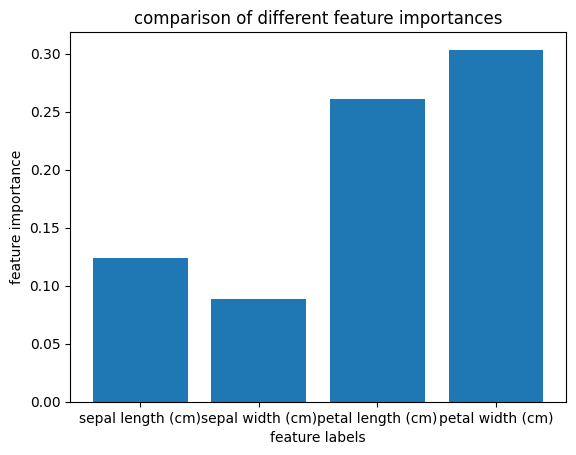

In [35]:
# importance features

# load libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# load iris data
iris_dataset = load_iris()

# create feature and target
x = iris_dataset.data
y = iris_dataset.target

# conver to categorial data by converting data to integers
x = x.astype(int)

# building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2)

# training the model
extra_tree_forest.fit(x, y)

# computing the importance each feature
feature_importance = extra_tree_forest.feature_importances_

# normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis=0)

# ploting a bar graph to compare models
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('feature labels')
plt.ylabel('feature importance')
plt.title('comparison of different feature importances')
plt.show()

### Correlation Matrix Heatmap
Metode ini akan menampilakn korelasi daripada sebuah fitur yang memiliki relasi dengan yang lainnya atau target fiturnya.

Korelasi bisa menjadi positif atau negatif

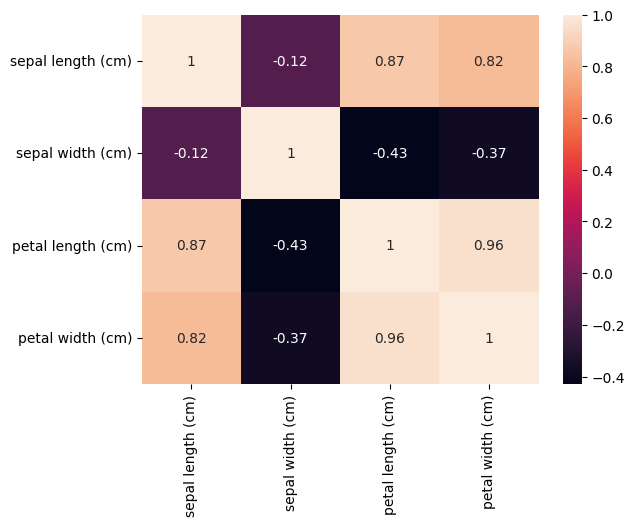

In [40]:
# correlation matrix heatmap

# laod libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load boston data
iris_dataset = load_iris()

# create a data frame for boston data
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

# ploting the heatmap for correlation
ax = sns.heatmap(iris.corr().round(2), annot=True)